 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>

1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.

<b> Part(a): Synthetic data generation </b>

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

3. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>

1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
2. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
3. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
   if there is an improvement on the classification error over the result of Part 2.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
   grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.

<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.


In [225]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
# %pip install scikit-learn
from sklearn.datasets import fetch_openml


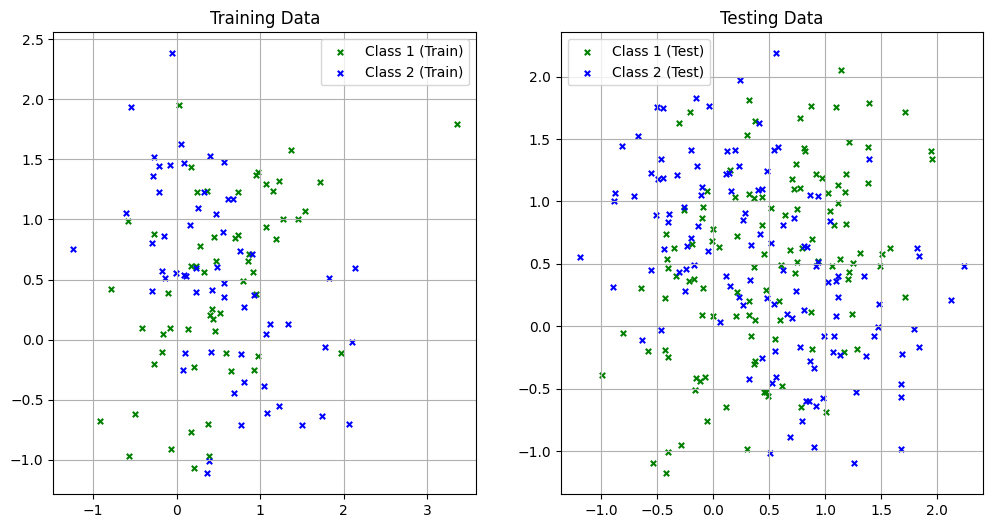

In [230]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1=[0,0]
mean2=[0,1]
mean3=[1,0]
mean4=[1,1]
cov=[[0.3,0],[0,0.3]]

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
sample1=np.random.multivariate_normal(mean1,cov,90)
sample2=np.random.multivariate_normal(mean2,cov,90)
sample3=np.random.multivariate_normal(mean3,cov,90)
sample4=np.random.multivariate_normal(mean4,cov,90)

#Generate training data
train1=sample1[:30]
train2=sample2[:30]
train3=sample3[:30]
train4=sample4[:30]

#Generate testing data
test1=sample1[30:]
test2=sample2[30:]
test3=sample3[30:]
test4=sample4[30:]

#class 1 for mean (0,0) and (1,1) , use 1 and 4
#making by 30 by 1 array containing +1, labels of class1
train1_labels=np.ones((30,1))
train4_labels=np.ones((30,1))

#class 2 for mean (0,1) and (1,0), use 2 and 3, labe is -1
#making by 30 by 1 array containing -1, labels of class2
train2_labels=-np.ones((30,1))
train3_labels=-np.ones((30,1))

#concatenation training data with respective labels
#in unshuffled X_train, the top 60 belong to class 1 and bottom 60 belong to class 2
X_train=np.concatenate((train1,train4,train2,train3),axis=0)
Y_train=np.concatenate((train1_labels,train4_labels,train2_labels,train3_labels),axis=0)

#do same for test data
test1_labels=np.ones((60,1))
test4_labels=np.ones((60,1))
test2_labels=-np.ones((60,1))
test3_labels=-np.ones((60,1))
#concatenating such that top ones belong to class 1 and bottom belong to class 2
X_test=np.concatenate((test1,test4,test2,test3),axis=0)
Y_test=np.concatenate((test1_labels,test4_labels,test2_labels,test3_labels),axis=0)

# print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

#Visualize the data using plt.scatter() function
#creating 2 plots, 1 for training and 1 for testing data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#for traing data set
axes[0].set_title('Training Data')
axes[0].scatter(X_train[:60,0],X_train[:60,1],c='green',label='Class 1 (Train)',marker='x',s=15)    #the top 60 belongs to class 1
axes[0].scatter(X_train[60:,0],X_train[60:,1],c='blue',label='Class 2 (Train)',marker='x',s=15)     #the bottom 60 belongs to class 2


#for testing data set
axes[1].set_title('Testing Data')
axes[1].scatter(X_test[:120,0],X_test[:120,1],c='green',label='Class 1 (Test)',marker='x',s=15)
axes[1].scatter(X_test[120:,0],X_test[120:,1],c='blue',label='Class 2 (Test)',marker='x',s=15)

axes[0].legend()
axes[1].legend()
axes[0].grid()
axes[1].grid()
plt.show()




accuracy = 64.58%


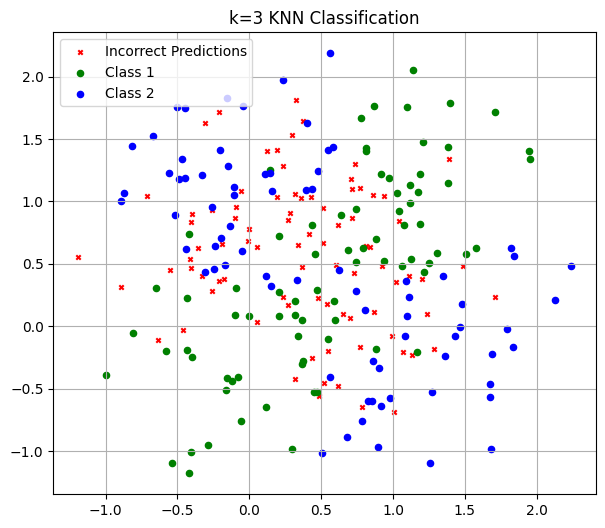

In [231]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
def kNNClassify(X_train,Y_train,X_test,k):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  #Algorithm
  #1.Initialize a list to store the predictions of our algorithm
  #2.Iterate through the test points
  #3.    Initialize a list to store the distances of test point with each of the training point.
  #4.    Iterate through the training points
  #5.        Compute the distance between the test and train point
  #6.    Find out the k nearest neighbours
  #7.    Get the most frequent label of k nearest neighbours
  #8.Return the predictions
  #Fill the code

  #initializing list to store predictions along with data point [coord,predicted_label]
  test_predictions=[]
  
  #iterating through test points
  for i in range(X_test.shape[0]):
    
    #initializing a list to store distances and labels [dist,label]
    distances=[]
    test_data_point = X_test[i]

    #iterating through training points and computing distances of training points from test point
    for j in range(X_train.shape[0]):
      distances.append([np.linalg.norm(test_data_point-X_train[j]),Y_train[j]])
    
    #sorting the distances based on the first element of the list (distance)
    distances = sorted(distances,key=lambda x:x[0])
    
    #checking the labels of first k points and storing the number of labels in each class 
    class1,class2=sum(1 for i in range(k) if distances[i][1]==1),sum(1 for i in range(k) if distances[i][1]==-1)
    
    if(class1>class2):
      test_predictions.append([test_data_point,1])  #appending the label of majority class
    else:
      test_predictions.append([test_data_point,-1])
  
  return test_predictions
        



#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''
  #Algorithm
  #1. Iterate through the total number of predictions
  #2.     Verify wheter the ground truth matches with the predictions
  #3. Compute and return the percentage of the correctly classified points
  #Fill the code

  #intializing lists to store correct and incorrect predictions data points
  correct_predictions = []
  correct_predictions_labels = []
  incorrect_predictions = []

  #initializing count of the number of labels matching with the predicted labels
  count = 0

  for i in range(len(true)):
    if(true[i]==pred[i][1]):
      count+=1
      correct_predictions.append(pred[i][0])
      correct_predictions_labels.append(pred[i][1])
    else:
      incorrect_predictions.append(pred[i][0])


  #returning the accuracy
  return count/len(true)*100 , correct_predictions, correct_predictions_labels,incorrect_predictions

#chosing k=3
test_predictions=kNNClassify(X_train,Y_train,X_test,3)
knn_accuracy , correct_predictions, correct_predictions_labels,incorrect_predictions=KNNAccuracy(Y_test,test_predictions)

print(f'accuracy = {knn_accuracy:.2f}%')

incorrect_predictions = np.array(incorrect_predictions)
correct_predictions = np.array(correct_predictions)
correct_predictions_labels = np.array(correct_predictions_labels)

#Create a visual representation of predictions
plt.figure(figsize=(7,6))

#mark incorrect prediction with red
plt.scatter(incorrect_predictions[:,0],incorrect_predictions[:,1],c='red',label='Incorrect Predictions',marker='x',s=10)

#in correct predictions mark with class 1 as green and class 2 as blue
class1_points = correct_predictions[correct_predictions_labels==1]
class2_points = correct_predictions[correct_predictions_labels==-1]

plt.scatter(class1_points[:,0],class1_points[:,1],c='green',label='Class 1',marker='o',s=20)
plt.scatter(class2_points[:,0],class2_points[:,1],c='blue',label='Class 2',marker='o',s=20)

plt.legend()
plt.title('k=3 KNN Classification')
plt.grid()
plt.show()

# plt.scatter?
#Generate and visualize the decision regions and overlay the test points


In [228]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,numrep,rho):
  #Iterate through range of k values
    #Iterate through number of repetations
      #Hold out rho fraction of training data in each repetition.



  #Return errors on training and validation data



#Plot training and validation errors for different values of k




#what is the best value for k?




#Effect of rho and number repetations on k




#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).






SyntaxError: incomplete input (2408399764.py, line 35)

In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases






#Experiments with more difficult data set.







In [ ]:
##################################
#Part(e): Influence of distance measure on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance measures






#Understand the decision regions of KNN classifier with different distance measures







In [232]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

#Create train, validation and test splits




#Write 'MultiClassKNNClassify' function




#Empirically chose most suitable k and error function based on the evauation on cross-validation data
#Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.
#Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.




#Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation




#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''



#Suggest an alternative ways to improve performance





/home/omdave/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


ImportError: Returning pandas objects requires pandas to be installed. Alternatively, explicitly set `as_frame=False` and `parser='liac-arff'`.

<b> Report your observations </b>

1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data

4.
